<div class="alert alert-block alert-info">
<font size="5"><b><center> Section 5</font></center>
<br>
<font size="5"><b><center>Recurrent Neural Network in PyTorch with an Introduction to Natural Language Processing</font></center>
</div>

# Simple Text Processing

## Typically Data Preprocessing Steps before Modeling Training for NLP Applications

* Read the data from disk
* Tokenize the text
* Create a mapping from word to a unique integer
* Convert the text into lists of integers
* Load the data in whatever format your deep learning framework requires
* Pad the text so that all the sequences are the same length, so you can process them in batch

In [1]:
thor_review = "the action scenes were top notch in this movie. Thor has never been this epic in the MCU. He does some pretty epic sh*t in this movie and he is definitely not under-powered anymore. Thor in unleashed in this, I love that."

In [2]:
word_embedding = "word embeddings are a representation of the *semantics* of a word, efficiently encoding semantic information that might be relevant to the task at hand"

In [4]:
print(list(word_embedding))

['w', 'o', 'r', 'd', ' ', 'e', 'm', 'b', 'e', 'd', 'd', 'i', 'n', 'g', 's', ' ', 'a', 'r', 'e', ' ', 'a', ' ', 'r', 'e', 'p', 'r', 'e', 's', 'e', 'n', 't', 'a', 't', 'i', 'o', 'n', ' ', 'o', 'f', ' ', 't', 'h', 'e', ' ', '*', 's', 'e', 'm', 'a', 'n', 't', 'i', 'c', 's', '*', ' ', 'o', 'f', ' ', 'a', ' ', 'w', 'o', 'r', 'd', ',', ' ', 'e', 'f', 'f', 'i', 'c', 'i', 'e', 'n', 't', 'l', 'y', ' ', 'e', 'n', 'c', 'o', 'd', 'i', 'n', 'g', ' ', 's', 'e', 'm', 'a', 'n', 't', 'i', 'c', ' ', 'i', 'n', 'f', 'o', 'r', 'm', 'a', 't', 'i', 'o', 'n', ' ', 't', 'h', 'a', 't', ' ', 'm', 'i', 'g', 'h', 't', ' ', 'b', 'e', ' ', 'r', 'e', 'l', 'e', 'v', 'a', 'n', 't', ' ', 't', 'o', ' ', 't', 'h', 'e', ' ', 't', 'a', 's', 'k', ' ', 'a', 't', ' ', 'h', 'a', 'n', 'd']


## Converting text into words

In [5]:
print(word_embedding.split())

['word', 'embeddings', 'are', 'a', 'representation', 'of', 'the', '*semantics*', 'of', 'a', 'word,', 'efficiently', 'encoding', 'semantic', 'information', 'that', 'might', 'be', 'relevant', 'to', 'the', 'task', 'at', 'hand']


## N-grams and NLTK

In [6]:
from nltk import ngrams

In [7]:
print(list(ngrams(word_embedding.split(),2)))

[('word', 'embeddings'), ('embeddings', 'are'), ('are', 'a'), ('a', 'representation'), ('representation', 'of'), ('of', 'the'), ('the', '*semantics*'), ('*semantics*', 'of'), ('of', 'a'), ('a', 'word,'), ('word,', 'efficiently'), ('efficiently', 'encoding'), ('encoding', 'semantic'), ('semantic', 'information'), ('information', 'that'), ('that', 'might'), ('might', 'be'), ('be', 'relevant'), ('relevant', 'to'), ('to', 'the'), ('the', 'task'), ('task', 'at'), ('at', 'hand')]


- `n-grams` is used in many supervised machine learning models, such as Naive Bayes, to improve feature space. 

- `n-grams` are also used for spelling correction and text-summarization tasks.

- Limitation of `n-grams` representation: it loses the sequential nature of text

**Do one-hot encoding using canned functions**

A major limitation of the one-hot representation is that the data is too sparse, because the size of the vector quickly grows as the number of unique words in the vocabulary increases. As such, this representation is not typically used in deep learning.

## Word Embedding

Word embedding is a very popular way of representing text data in problems that are solved by deep learning algorithms

Word embedding provides a dense representation of a word filled with floating numbers. 

It drastically reduces the dimension of the dictionary



###  `Torchtext` and Training word embedding by building a sentiment classifier

Torchtext takes a declarative approach to loading its data: 

  * you tell torchtext how you want the data to look like, and torchtext handles it for you
  
  * Declaring a Field: The Field specifies how you want a certain field to be processed
  
The `Field` class is a fundamental component of torchtext and is what makes preprocessing very easy



### Load `torchtext.datasets`

In [13]:
# pip install torchtext
from torchtext import data, datasets
from torchtext.vocab import GloVe,FastText,CharNGram

# import torch.nn as nn
# import torch.optim as optim
# import torch.nn.functional as F
# from torch.autograd import Variable

# import torch

* Define two `Field` objects for the actual texts and the labels.

* For the actual texts, `torchtext` will lowercase, tokenize, and trim the text to a maximum length of 20. We could change the maximum length of the text to other numbers.

In [14]:
TEXT = data.Field(lower=True, batch_first=True, fix_length=20)
LABEL = data.Field(sequential=False)

- **Use `torch.datasets` to download the `IMDB` dataset and split it into train and test datasets**

- The following command abstracts away all the complexity involved in downloading, tokenizing, and splitting the database into train and test datasets

- `torch.datasets` come with many datasets, such as `IMDB` for sentiment analysis, `TREC` for question classification, `WikiText-2` for language modeling, etc.

- For tokenization, `SpaCy` can also be specified

In [16]:
train, test = datasets.IMDB.splits(TEXT, LABEL)

`train.fields` contains a dictionary where `TEXT` is the key and the `value` LABEL

In [20]:
type(train.fields)

dict

In [21]:
print('train.fields', train.fields)

train.fields {'text': <torchtext.data.field.Field object at 0x1a1d6ed400>, 'label': <torchtext.data.field.Field object at 0x1a1d6ed470>}


In [41]:
train.fields.keys()

dict_keys(['text', 'label'])

In [29]:
len(train.fields)

2

In [44]:
train.fields.values()

dict_values([<torchtext.data.field.Field object at 0x1a1d6ed400>, <torchtext.data.field.Field object at 0x1a1d6ed470>])

In [47]:
train.fields.items()

dict_items([('text', <torchtext.data.field.Field object at 0x1a1d6ed400>), ('label', <torchtext.data.field.Field object at 0x1a1d6ed470>)])

In [30]:
type(train)

torchtext.datasets.imdb.IMDB

In [35]:
len(train)

25000

In [37]:
len(train[:5000])

5000

In [38]:
len(train[0].text)

52

In [ ]:
print(vars(train[0]))

### Buidling a vocabulary

The `torchtext` facilitate the creation of a dictionary from a corpus of text. Once a dataset is loaded, we can call `build_vocab` and pass the necessary arguments that will handle building the vocabulary for the data. 

For instance, in the code below, we can initialize vectors with `pretrained embeddings of dimensions 300`

In [ ]:
TEXT.build_vocab(train, vectors=GloVe(name='6B', dim=300), max_size=10000,min_freq=10)
LABEL.build_vocab(train)

Once the vocabulary is built, we can obtain different values such as 
    * frequency
    * word index
    * vector representation for each word

In [ ]:
#print(TEXT.vocab.freqs)

In [ ]:
print(TEXT.vocab.vectors)

In [ ]:
TEXT.vocab.vectors.shape

In [ ]:
TEXT.vocab.vectors[3].shape

In [ ]:
TEXT.vocab.vectors[234]

In [ ]:
print(TEXT.vocab.stoi)

### Batching

`Torchtext` provides `BucketIterator`, which helps in batching all the text and replacing the words with the index number of the words.

* The `BucketIterator` instance comes with a lot of useful parameters like `batch_size`, `device` (GPU or CPU), and `shuffle`.

In [ ]:
train_iter, test_iter = data.BucketIterator.splits((train, test), batch_size=128, device=-1,shuffle=True)

**Create a batch**

In [ ]:
batch = next(iter(train_iter))
print(batch.text.shape)
print(batch.label.shape)

# batch_size x fix_len
batch.text

In [ ]:
batch.label

### Create a network with Word Embedding

# Use LSTM for Sentiment Classification

1. Preparing the data
2. Creating the batches 
3. Creating the network 
4. Training the model

In [49]:
TEXT = data.Field(lower=True,fix_length=20,batch_first=False)
LABEL = data.Field(sequential=False,)

train, test = datasets.imdb.IMDB.splits(TEXT, LABEL)
TEXT.build_vocab(train, vectors=GloVe(name='6B', dim=300),max_size=10000,min_freq=10)
LABEL.build_vocab(train,)

In [50]:
train_iter, test_iter = data.BucketIterator.splits((train, test), batch_size=32, device=-1)
train_iter.repeat = False
test_iter.repeat = False

The `device` argument should be set by using `torch.device` or passing a string as an argument. This behavior will be deprecated soon and currently defaults to cpu.
The `device` argument should be set by using `torch.device` or passing a string as an argument. This behavior will be deprecated soon and currently defaults to cpu.


In [51]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

In [52]:
class IMDBRnn(nn.Module):
    
    def __init__(self,vocab,hidden_size,n_cat,bs=1,nl=2):
        super().__init__()
        self.hidden_size = hidden_size
        self.bs = bs
        self.nl = nl
        self.e = nn.Embedding(n_vocab,hidden_size)
        self.rnn = nn.LSTM(hidden_size,hidden_size,nl)
        self.fc2 = nn.Linear(hidden_size,n_cat)
        self.softmax = nn.LogSoftmax(dim=-1)

    def forward(self,inp):
        bs = inp.size()[1]
        if bs != self.bs:
            self.bs = bs
        e_out = self.e(inp)
        h0 = c0 = Variable(e_out.data.new(*(self.nl,self.bs,self.hidden_size)).zero_())
        rnn_o,_ = self.rnn(e_out,(h0,c0))
        rnn_o = rnn_o[-1]
        fc = F.dropout(self.fc2(rnn_o),p=0.8)
        return self.softmax(fc)

In [54]:
n_vocab = len(TEXT.vocab)
n_hidden = 100

In [56]:
model = IMDBRnn(n_vocab,n_hidden,3,bs=32)
#model = model.cuda()

optimizer = optim.Adam(model.parameters(),lr=1e-3)

def fit(epoch,model,data_loader,phase='training',volatile=False):
    if phase == 'training':
        model.train()
    if phase == 'validation':
        model.eval()
        volatile=True
    running_loss = 0.0
    running_correct = 0
    for batch_idx , batch in enumerate(data_loader):
        text , target = batch.text , batch.label
#         if is_cuda:
#             text,target = text.cuda(),target.cuda()
        
        if phase == 'training':
            optimizer.zero_grad()
        output = model(text)
        loss = F.nll_loss(output,target)
        
        running_loss += F.nll_loss(output,target,size_average=False).data[0]
        preds = output.data.max(dim=1,keepdim=True)[1]
        running_correct += preds.eq(target.data.view_as(preds)).cpu().sum()
        if phase == 'training':
            loss.backward()
            optimizer.step()
    
    loss = running_loss/len(data_loader.dataset)
    accuracy = 100. * running_correct/len(data_loader.dataset)
    print("loss: ", loss, "accuracy: ", accuracy)
    #print(f'{phase} loss is {loss:{5}.{2}} and {phase} accuracy is {running_correct}/{len(data_loader.dataset)}{accuracy:{10}.{4}}')
    return loss,accuracy

In [72]:
import time
start = time.time()

train_losses , train_accuracy = [],[]
val_losses , val_accuracy = [],[]

for epoch in range(1,20):

    epoch_loss, epoch_accuracy = fit(epoch,model,train_iter,phase='training')
    val_epoch_loss , val_epoch_accuracy = fit(epoch,model,test_iter,phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)
    
end = time.time()
print((end-start)/60)
print("Execution Time: ", round(((end-start)/60),1), "minutes")

/Users/jeffrey/anaconda2/envs/dl/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/Users/jeffrey/anaconda2/envs/dl/lib/python3.6/site-packages/ipykernel/__main__.py:24: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


loss:  tensor(0.2421) accuracy:  tensor(90)
loss:  tensor(0.8032) accuracy:  tensor(67)
loss:  tensor(0.1540) accuracy:  tensor(94)
loss:  tensor(1.0945) accuracy:  tensor(67)
loss:  tensor(0.0927) accuracy:  tensor(96)
loss:  tensor(1.3375) accuracy:  tensor(67)
loss:  tensor(0.0565) accuracy:  tensor(98)
loss:  tensor(1.5365) accuracy:  tensor(67)
loss:  tensor(0.0473) accuracy:  tensor(98)
loss:  tensor(1.8395) accuracy:  tensor(67)
loss:  tensor(0.0289) accuracy:  tensor(99)
loss:  tensor(1.8005) accuracy:  tensor(66)
loss:  tensor(0.0351) accuracy:  tensor(98)
loss:  tensor(1.7201) accuracy:  tensor(66)
loss:  tensor(0.0264) accuracy:  tensor(99)
loss:  tensor(2.0049) accuracy:  tensor(66)
loss:  tensor(0.0218) accuracy:  tensor(99)
loss:  tensor(2.0042) accuracy:  tensor(66)
loss:  tensor(0.0215) accuracy:  tensor(99)
loss:  tensor(2.0093) accuracy:  tensor(66)
loss:  tensor(0.0192) accuracy:  tensor(99)
loss:  tensor(2.0018) accuracy:  tensor(66)
loss:  tensor(0.0207) accuracy: 

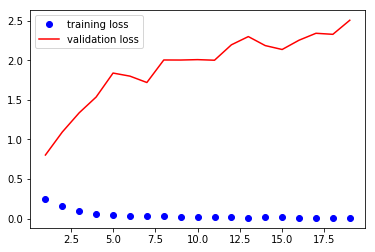

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1,len(train_losses)+1),train_losses,'bo',label = 'training loss')
plt.plot(range(1,len(val_losses)+1),val_losses,'r',label = 'validation loss')
plt.legend()

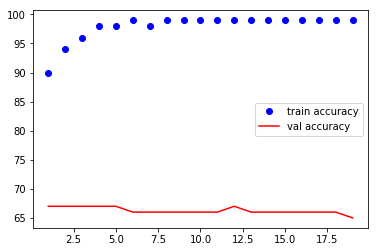

In [74]:
plt.plot(range(1,len(train_accuracy)+1),train_accuracy,'bo',label = 'train accuracy')
plt.plot(range(1,len(val_accuracy)+1),val_accuracy,'r',label = 'val accuracy')
plt.legend()